In [68]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import shapiro,boxcox,mannwhitneyu,fligner, ttest_ind
import warnings

In [69]:
data = pd.read_excel('задание1.xlsx')
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
data = data.drop("t",axis=1)
data

,Y,X1,X2,X3,X4
0,31.2,492.9,37.3,54.7,77.4
1,33.3,528.6,38.1,63.7,80.2
2,35.6,560.3,39.3,69.8,80.4
3,36.4,624.6,37.8,65.9,83.9
4,36.7,666.4,38.4,64.5,85.5
...,...,...,...,...,...
14,46.7,1575.5,63.7,130.9,165.5
15,50.6,1759.1,61.6,129.8,203.3
16,50.1,1994.2,58.9,128.0,219.6
17,51.7,2258.1,66.4,141.0,221.6


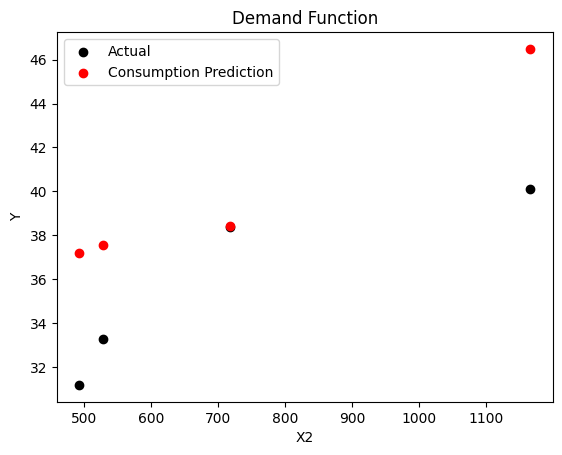

Y = 0.44*X2


In [70]:
X = data[['X1', 'X2', 'X3', 'X4']]
y = data['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_demand = LinearRegression()
model_demand.fit(X_train[['X2']], y_train)
y_train_pred_demand = model_demand.predict(X_train[['X2']])
y_test_pred_demand = model_demand.predict(X_test[['X2']])

plt.scatter(X_test['X1'], y_test, color='black', label='Actual')
plt.scatter(X_test['X1'], y_test_pred_demand, color='red', label='Consumption Prediction')
plt.title('Demand Function')
plt.xlabel('X2')
plt.ylabel('Y')
plt.legend()
plt.show()

print(f"Y = {model_demand.coef_[0]:.2f}*X2")

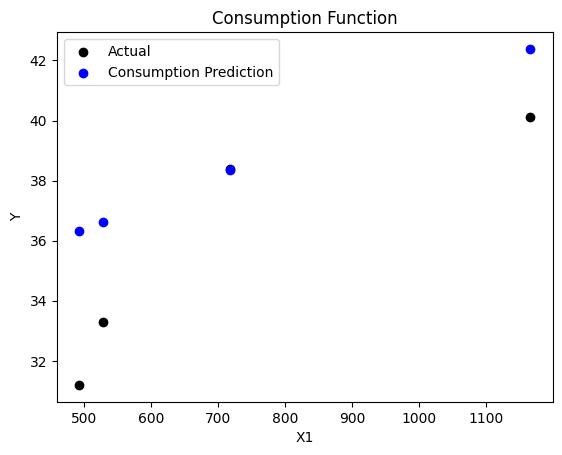

Y = 31.86 + 0.01*X1


In [71]:
model_consumption = LinearRegression()
model_consumption.fit(X_train[['X1']], y_train)
y_train_pred_consumption = model_consumption.predict(X_train[['X1']])
y_test_pred_consumption = model_consumption.predict(X_test[['X1']])

plt.scatter(X_test['X1'], y_test, color='black', label='Actual')
plt.scatter(X_test['X1'], y_test_pred_consumption, color='blue', label='Consumption Prediction')
plt.title('Consumption Function')
plt.xlabel('X1')
plt.ylabel('Y')
plt.legend()
plt.show()

print(f"Y = {model_consumption.intercept_:.2f} + {model_consumption.coef_[0]:.2f}*X1")

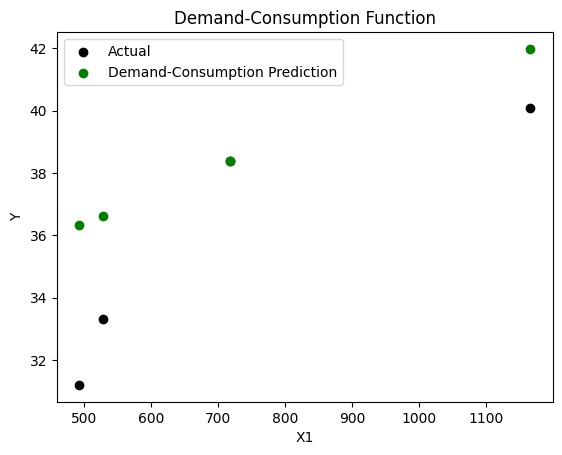

Y = 33.14 + 0.01*X1 -0.04*X2


In [72]:
model_demand_consumption = LinearRegression()
model_demand_consumption.fit(X_train[['X1', 'X2']], y_train)
y_train_pred_demand_consumption = model_demand_consumption.predict(X_train[['X1', 'X2']])
y_test_pred_demand_consumption = model_demand_consumption.predict(X_test[['X1', 'X2']])

plt.scatter(X_test['X1'], y_test, color='black', label='Actual')
plt.scatter(X_test['X1'], y_test_pred_demand_consumption, color='green', label='Demand-Consumption Prediction')
plt.title('Demand-Consumption Function')
plt.xlabel('X1')
plt.ylabel('Y')
plt.legend()
plt.show()

print(f"Y = {model_demand_consumption.intercept_:.2f} + {model_demand_consumption.coef_[0]:.2f}*X1 {model_demand_consumption.coef_[1]:.2f}*X2")

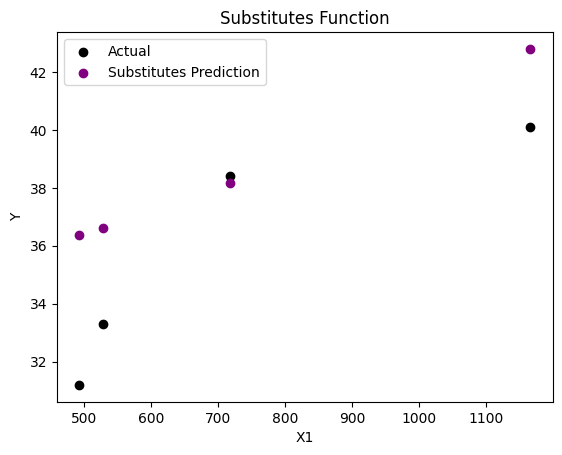

Y = 29.68 + 0.00*X1 -0.02*X2 -0.01*X3 + 0.09*X4


In [73]:
model_substitutes = LinearRegression()
model_substitutes.fit(X_train[['X1', 'X2', 'X3', 'X4']], y_train)
y_train_pred_substitutes = model_substitutes.predict(X_train[['X1', 'X2', 'X3', 'X4']])
y_test_pred_substitutes = model_substitutes.predict(X_test[['X1', 'X2', 'X3', 'X4']])

plt.scatter(X_test['X1'], y_test, color='black', label='Actual')
plt.scatter(X_test['X1'], y_test_pred_substitutes, color='purple', label='Substitutes Prediction')
plt.title('Substitutes Function')
plt.xlabel('X1')
plt.ylabel('Y')
plt.legend()
plt.show()

print(f"Y = {model_substitutes.intercept_:.2f} + {model_substitutes.coef_[0]:.2f}*X1 {model_substitutes.coef_[1]:.2f}*X2 {model_substitutes.coef_[2]:.2f}*X3 + {model_substitutes.coef_[3]:.2f}*X4")

In [74]:
X1 = data['X1']
X2 = data['X2']
X3 = data['X3']
X4 = data['X4']


stat_X1, p_value_X1 = shapiro(X1)
stat_X2, p_value_X2 = shapiro(X2)
stat_X3, p_value_X3 = shapiro(X3)
stat_X4, p_value_X4 = shapiro(X4)

print(f"Тест Шапиро-Уилка для X1: Statistic={stat_X1}, p-value={p_value_X1}")
print(f"Тест Шапиро-Уилка для X2: Statistic={stat_X2}, p-value={p_value_X2}")
print(f"Тест Шапиро-Уилка для X3: Statistic={stat_X3}, p-value={p_value_X3}")
print(f"Тест Шапиро-Уилка для X4: Statistic={stat_X4}, p-value={p_value_X4}")


Тест Шапиро-Уилка для X1: Statistic=0.896443247795105, p-value=0.04197002574801445
Тест Шапиро-Уилка для X2: Statistic=0.8548540472984314, p-value=0.008054640144109726
Тест Шапиро-Уилка для X3: Statistic=0.89530348777771, p-value=0.04003702849149704
Тест Шапиро-Уилка для X4: Statistic=0.8776261210441589, p-value=0.01952611841261387


In [75]:
if p_value_X1 < 0.05:
    X1_transformed, _ = boxcox(X1 + np.abs(X1.min()) + 1) 

if p_value_X2 < 0.05:
    X2_transformed, _ = boxcox(X2 + np.abs(X2.min()) + 1)

if p_value_X3 < 0.05:
    X3_transformed, _ = boxcox(X3 + np.abs(X3.min()) + 1)

if p_value_X4 < 0.05:
    X4_transformed, _ = boxcox(X4 + np.abs(X4.min()) + 1)

data_transformed = pd.DataFrame({
    'X1': X1_transformed if p_value_X1 < 0.05 else X1,
    'X2': X2_transformed if p_value_X2 < 0.05 else X2,
    'X3': X3_transformed if p_value_X3 < 0.05 else X3,
    'X4': X4_transformed if p_value_X4 < 0.05 else X4
})
data_transformed

,X1,X2,X3,X4
0,1.254619,0.577319,1.273006,0.728447
1,1.254766,0.577325,1.275098,0.728464
2,1.254889,0.577333,1.276364,0.728465
3,1.255120,0.577323,1.275567,0.728486
4,1.255257,0.577327,1.275270,0.728495
...,...,...,...,...
14,1.256971,0.577450,1.284895,0.728776
15,1.257163,0.577443,1.284786,0.728846
16,1.257372,0.577433,1.284605,0.728869
17,1.257567,0.577458,1.285847,0.728872


In [76]:
stat, p_value = mannwhitneyu(data['X3'], data['X4'])
print(f'Statistics={stat}, p-value={p_value}')

if p_value < 0.05:
    print('Существует статистически значимая разница между X3 и X4.')
else:
    print('Нет статистически значимой разницы между X3 и X4.')

Statistics=102.0, p-value=0.02277486537233766
Существует статистически значимая разница между X3 и X4.


In [77]:
stat, p_value = fligner(data['X2'], data['X3'])
print(f'Statistics={stat}, p-value={p_value}')

if p_value < 0.05:
    print('Существует статистически значимая разница в дисперсии между X2 и X3.')
    stat, p_value = ttest_ind(data['X2'], data['X3'], equal_var=False)
else:
    print('Нет статистически значимой разницы в дисперсии между X2 и X3.')
    stat, p_value = ttest_ind(data['X2'], data['X3'], equal_var=True)

print(f'Statistics={stat}, p-value={p_value}')

if p_value < 0.05:
    print('Существует статистически значимая разница между X2 и X3.')
else:
    print('Нет статистически значимой разницы между X2 и X3.')

Statistics=16.797459660607196, p-value=4.158894013328987e-05
Существует статистически значимая разница в дисперсии между X2 и X3.
Statistics=-5.937606839472742, p-value=5.474644516999182e-06
Существует статистически значимая разница между X2 и X3.
